In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

dj = yf.download('^DJI', start = '1920-01-17', end='2025-07-31')

dj.to_csv('dj.csv')

djdf = pd.read_csv('dj.csv', index_col='Price', parse_dates=True)
djdf.tail()

C:\Users\Delyan\AppData\Local\Temp\ipykernel_24092\145415747.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dj = yf.download('^DJI', start = '1920-01-17', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\Delyan\AppData\Local\Temp\ipykernel_24092\145415747.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djdf = pd.read_csv('dj.csv', index_col='Price', parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
2025-07-24,44693.91015625,44912.26953125,44674.5703125,44776.41015625,453000000
2025-07-25,44901.921875,44944.4609375,44650.58984375,44757.28125,369500000
2025-07-28,44837.55859375,44946.98046875,44739.9609375,44946.98046875,416510000
2025-07-29,44632.98828125,44883.66015625,44568.828125,44833.73828125,488780000
2025-07-30,44461.28125,44739.53125,44261.7109375,44677.8984375,456840000


In [6]:
#Start after cleaning the csv file in excel
djdf = pd.read_csv('dj_clean.csv', parse_dates=True)
djdf.head()

,Date,Close,High,Low,Open,Volume
0,1/2/1992,3172.399902,3172.629883,3139.310059,3152.100098,23550000
1,1/3/1992,3201.500000,3210.639893,3165.919922,3172.399902,23620000
2,1/6/1992,3200.100098,3213.330078,3191.860107,3201.500000,27280000
3,1/7/1992,3204.800049,3210.199951,3184.479980,3200.100098,25510000
4,1/8/1992,3203.899902,3229.199951,3185.820068,3204.800049,29040000


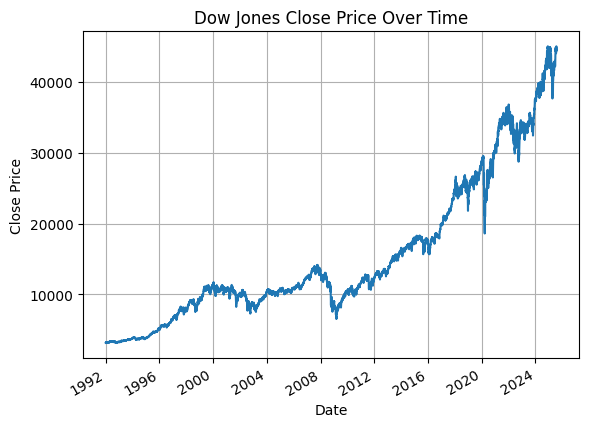

In [7]:
#A graph show
djdf['Date'] = pd.to_datetime(djdf['Date'])

# Set 'Date' as index
djdf.set_index('Date', inplace=True)

# Convert 'Close' to numeric, in case it's still object type
djdf['Close'] = pd.to_numeric(djdf['Close'], errors='coerce')

djdf['Close'].plot(title='Dow Jones Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

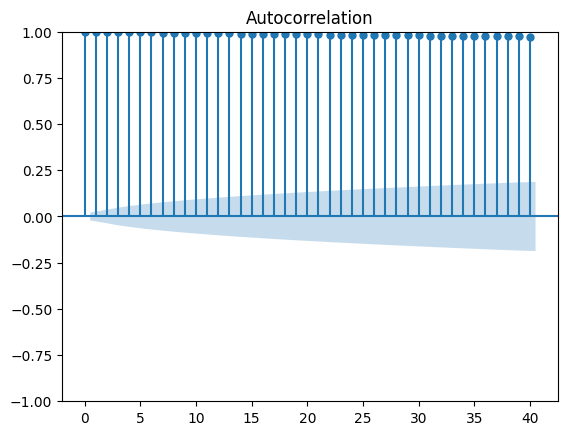

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#**************************
# Plot ACF for 'Close' column
plot_acf(djdf['Close'])
plt.show()


In [13]:
#This is incorporated in the final code (All working)
from pmdarima import auto_arima

# Automatically find the best ARIMA parameters
auto_model = auto_arima(
    train, 
    seasonal=False, 
    stepwise=True, 
    suppress_warnings=True,
    trace=True,      # shows the search process
    error_action='ignore'
)

print(auto_model.summary())

# Fit ARIMA with the best parameters
arima_model = ARIMA(train, order=auto_model.order)
arima_model_fit = arima_model.fit()

# Forecast
arima_forecast = arima_model_fit.forecast(steps=len(test))

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4270.468, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4272.403, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4272.414, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4268.481, Time=0.02 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4274.447, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.537 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  288
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2133.241
Date:                Sat, 16 Aug 2025   AIC                           4268.481
Time:                        19:49:17   BIC                           4272.141
Sample:                    03-14-2024   HQIC                          4269.948
                         - 04-21-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.668e+05   5114.844     32.607      0.000    1.57e+05 

NameError: name 'ARIMA' is not defined

Train: 2024-03-14 → 2025-04-21  (288 pts)
Test : 2025-04-22 → 2025-07-30   (72 pts)
ES choice on validation: multiplicative+damped


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Linear Regression (log+recent) -> MAE: 1613.11, RMSE: 1961.92
Exponential Smoothing (multiplicative+damped) -> MAE: 3950.06, RMSE: 4120.00
ARIMA (drift, m=21, max_d=1) -> MAE: 5875.75, RMSE: 6272.93


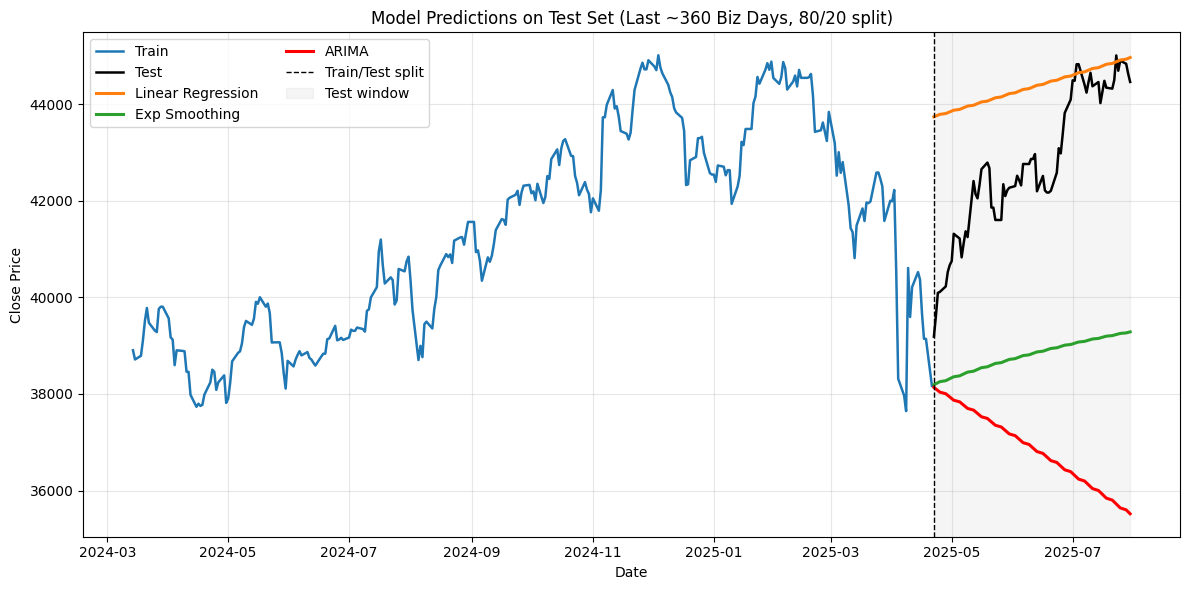

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

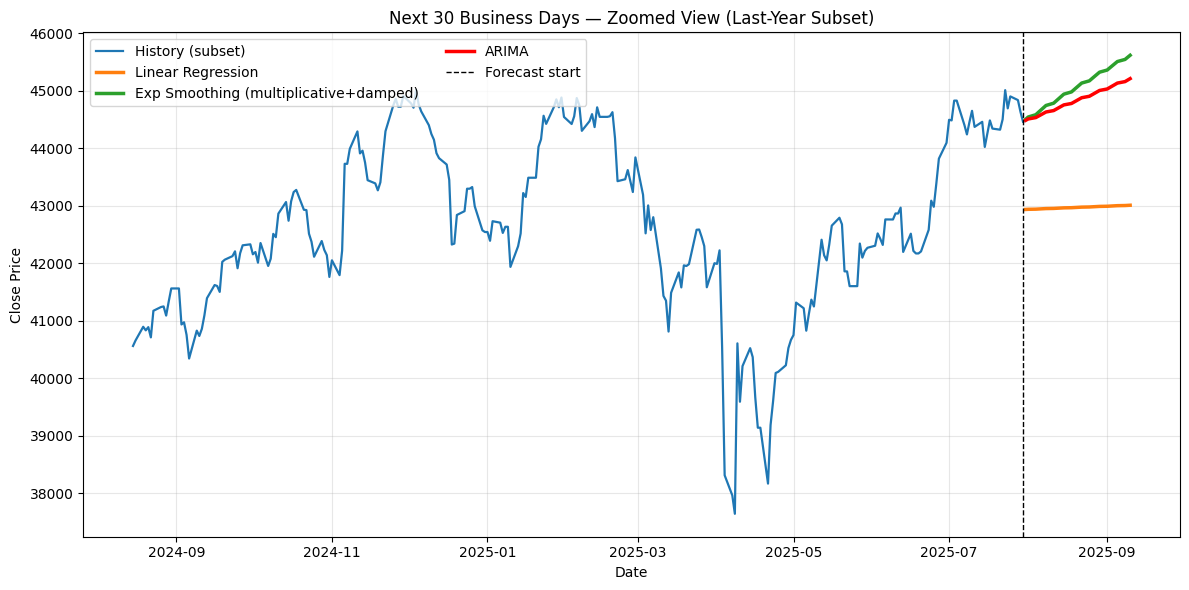

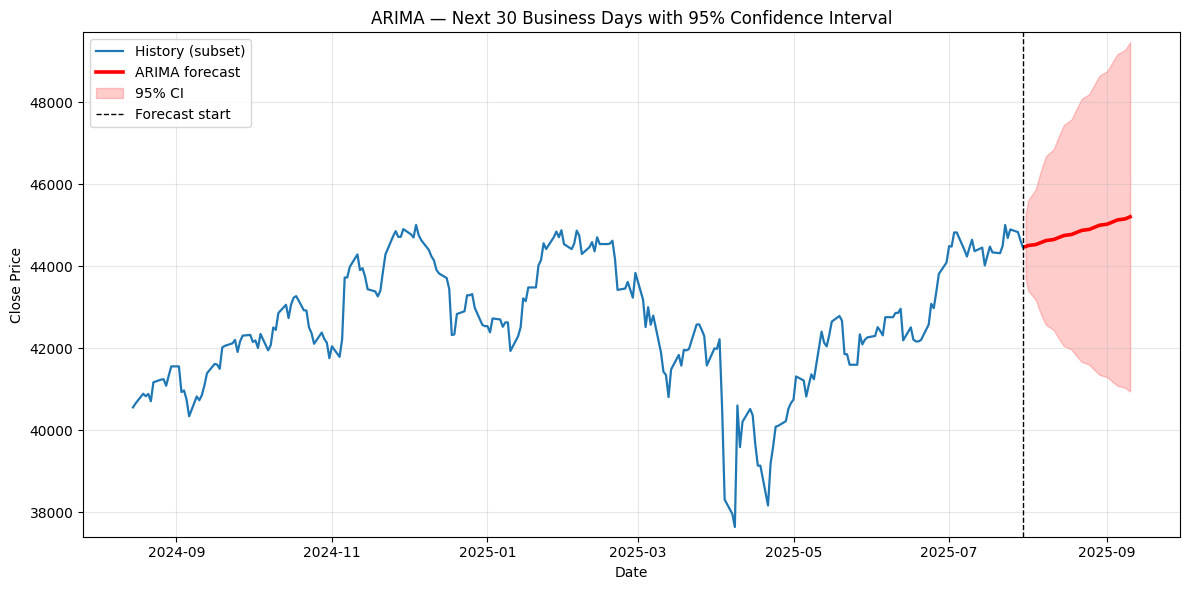

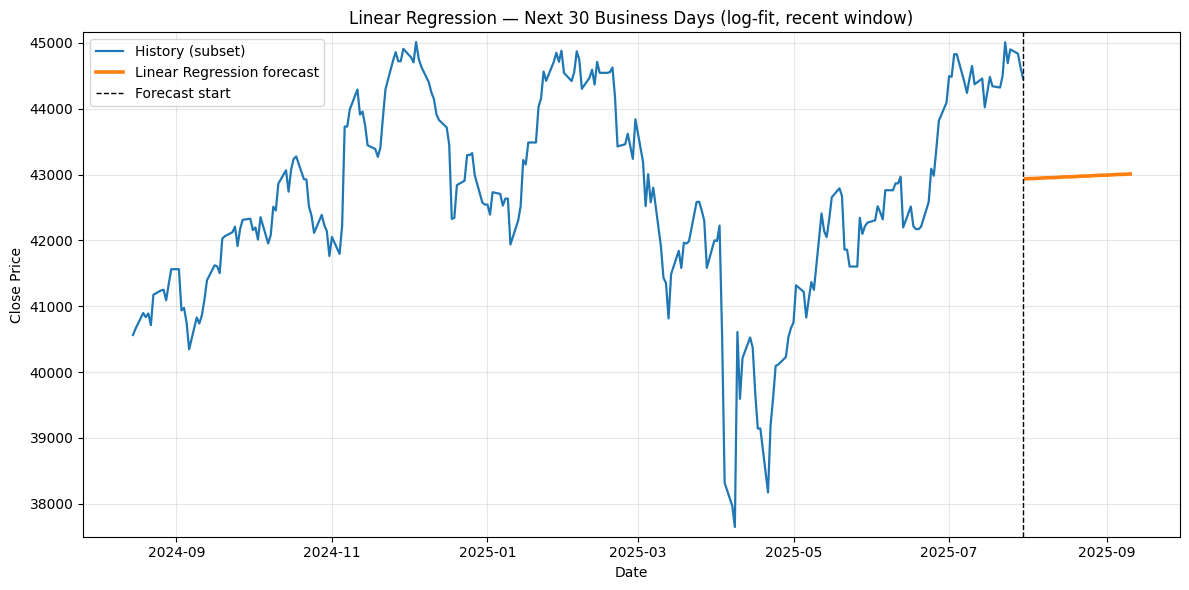

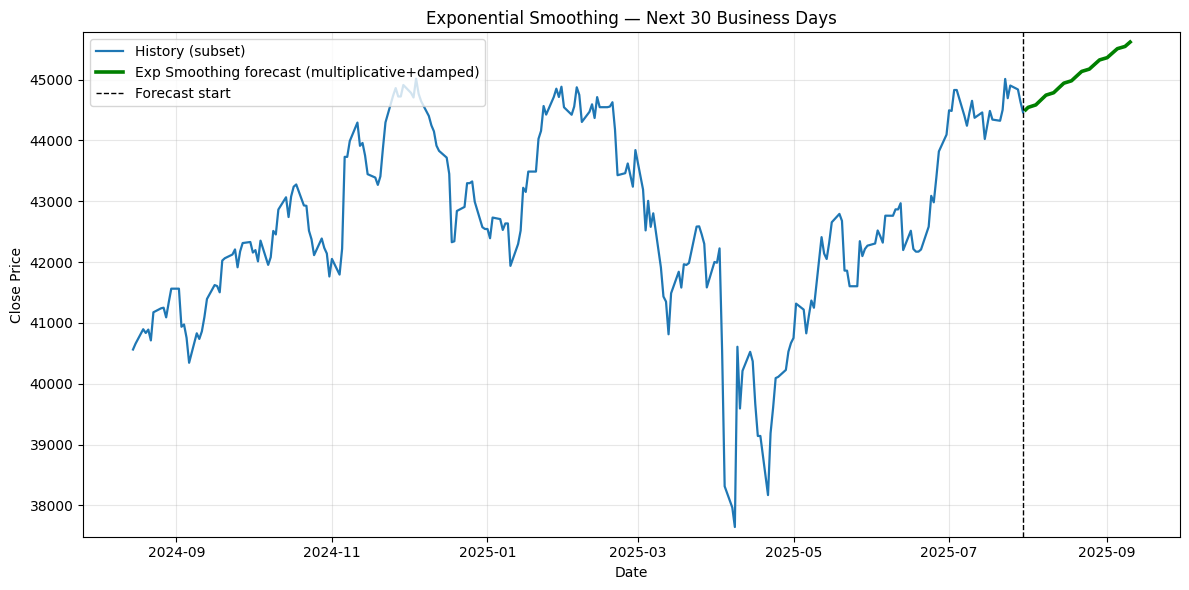

            LinearRegression_Forecast  ExpSmoothing_Forecast  ARIMA_Forecast  \
2025-07-31               42936.397900           44502.159147    44485.300421   
2025-08-01               42938.922073           44542.869952    44509.386312   
2025-08-04               42941.446395           44583.414167    44533.538922   
2025-08-05               42943.970864           44623.792290    44557.758253   
2025-08-06               42946.495483           44664.004817    44582.044304   
2025-08-07               42949.020249           44704.052248    44606.397074   
2025-08-08               42951.545164           44743.935080    44630.816564   
2025-08-11               42954.070227           44783.653814    44655.302775   
2025-08-12               42956.595439           44823.208948    44679.855705   
2025-08-13               42959.120800           44862.600981    44704.475355   
2025-08-14               42961.646308           44901.830414    44729.161725   
2025-08-15               42964.171966   

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima

# ==========================
# 0) Data prep (expects sp500df with DatetimeIndex + 'Close')
# ==========================
y = djdf['Close'].asfreq('B').ffill()

# ==========================
# 1) Last ~360 business days, then 80/20 split. ****Note**** When doing it for the whole period, the prediction is barely visible
# ==========================
last_n = 360
y_recent = y.tail(last_n)

split_idx = int(len(y_recent) * 0.8)  # 80%
train = y_recent.iloc[:split_idx]
test  = y_recent.iloc[split_idx:]
split_date = test.index[0]

print(f"Train: {train.index[0].date()} → {train.index[-1].date()}  ({len(train)} pts)")
print(f"Test : {test.index[0].date()} → {test.index[-1].date()}   ({len(test)} pts)")

# ==========================
# 2) Fit on TRAIN -> predict TEST
# ==========================

# ---- Linear Regression (log + recent window inside TRAIN) ----
recent_n_lr = min(250, len(train))  # ~1Y of trading days
y_recent_train = train.tail(recent_n_lr)
X_train_lr = np.arange(len(y_recent_train)).reshape(-1, 1)
X_test_lr  = np.arange(len(y_recent_train), len(y_recent_train) + len(test)).reshape(-1, 1)

lr = LinearRegression().fit(X_train_lr, np.log(y_recent_train))
lin_pred = pd.Series(np.exp(lr.predict(X_test_lr)), index=test.index)

# ---- Exponential Smoothing (damped; choose add vs mult by validation) ----
es_add = ExponentialSmoothing(train, trend='add', damped_trend=True, seasonal=None).fit(optimized=True)
es_mul = ExponentialSmoothing(train, trend='mul', damped_trend=True, seasonal=None).fit(optimized=True)

es_add_pred = pd.Series(es_add.forecast(len(test)).values, index=test.index)
es_mul_pred = pd.Series(es_mul.forecast(len(test)).values, index=test.index)

# pick the better one on MAE, so it'll automatically choose the better
mae_add = mean_absolute_error(test, es_add_pred)
mae_mul = mean_absolute_error(test, es_mul_pred)

if mae_add <= mae_mul:
    es_fit = es_add
    es_pred = es_add_pred
    es_choice = "additive+damped"
else:
    es_fit = es_mul
    es_pred = es_mul_pred
    es_choice = "multiplicative+damped"
print(f"ES choice on validation: {es_choice}")

# ---- ARIMA (allow drift/time-trend, cap differencing, try monthly seasonality) ----
arima_model = auto_arima(
    train,
    seasonal=True, m=21,          # try short seasonality; set to False if you want no seasonality
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    max_d=1,                      # avoid overdifferencing (flat forecasts)
    trend='t',                    # time-trend (drift)
    information_criterion='aic'
)
arima_pred = pd.Series(arima_model.predict(n_periods=len(test)), index=test.index)

arima_full = auto_arima(y_recent, seasonal=True, m=21, max_d=1, trend='t',
                        stepwise=True, suppress_warnings=True, error_action='ignore')

# ==========================
# 3) Evaluation on TEST
# ==========================
def evaluate(true, pred, name):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {np.sqrt(mse):.2f}")

evaluate(test, lin_pred, "Linear Regression (log+recent)")
evaluate(test, es_pred,  f"Exponential Smoothing ({es_choice})")
evaluate(test, arima_pred, "ARIMA (drift, m=21, max_d=1)")

# --- Clear train/test plot with predictions ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', linewidth=1.8)
plt.plot(test.index, test, label='Test', linewidth=1.8, color='black')

plt.plot(lin_pred.index, lin_pred, label='Linear Regression', linewidth=2.2)
plt.plot(es_pred.index, es_pred, label='Exp Smoothing', linewidth=2.2)
plt.plot(arima_pred.index, arima_pred, label='ARIMA', linewidth=2.2, color='red')

plt.axvline(split_date, linestyle='--', color='k', linewidth=1, label='Train/Test split')
plt.axvspan(split_date, test.index[-1], color='grey', alpha=0.08, label='Test window')

plt.title('Model Predictions on Test Set (Last ~360 Biz Days, 80/20 split)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True, ncol=2)
plt.tight_layout()
plt.show()

# ==========================
# 4) Refit on FULL last-year subset -> forecast next 30 business days
# ==========================
forecast_horizon = 30
future_idx = pd.date_range(y_recent.index[-1] + pd.tseries.offsets.BDay(),
                           periods=forecast_horizon, freq='B')

# Linear Regression forecast (log + recent window)
y_recent_full = y_recent.tail(recent_n_lr)
X_full_lr   = np.arange(len(y_recent_full)).reshape(-1, 1)
X_future_lr = np.arange(len(y_recent_full), len(y_recent_full) + forecast_horizon).reshape(-1, 1)
lr = LinearRegression().fit(X_full_lr, np.log(y_recent_full))
lin_fc = pd.Series(np.exp(lr.predict(X_future_lr)), index=future_idx)

# Exponential Smoothing forecast (use the chosen type but refit on full subset)
if es_choice.startswith("add"):
    es_full_fit = ExponentialSmoothing(y_recent, trend='add', damped_trend=True, seasonal=None).fit(optimized=True)
else:
    es_full_fit = ExponentialSmoothing(y_recent, trend='mul', damped_trend=True, seasonal=None).fit(optimized=True)
es_fc = pd.Series(es_full_fit.forecast(steps=forecast_horizon).values, index=future_idx)

# ARIMA forecast + 95% Confidence intervals (same constraints; refit on full subset)
arima_full_model = auto_arima(
    y_recent,
    seasonal=True, m=21,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    max_d=1,
    trend='t',
    information_criterion='aic'
)
arima_mean, arima_ci = arima_full_model.predict(
    n_periods=forecast_horizon, return_conf_int=True, alpha=0.05
)
arima_fc    = pd.Series(arima_mean, index=future_idx)
arima_lower = pd.Series(arima_ci[:, 0], index=future_idx)
arima_upper = pd.Series(arima_ci[:, 1], index=future_idx)

# ==========================
# 5) Plots
# ==========================

# (A) Optional combined zoomed forecast for context
hist_tail = y_recent.tail(250)
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(lin_fc.index, lin_fc, label='Linear Regression', linewidth=2.5)
plt.plot(es_fc.index, es_fc, label=f'Exp Smoothing ({es_choice})', linewidth=2.5)
plt.plot(arima_fc.index, arima_fc, label='ARIMA', linewidth=2.5, color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')
plt.title('Next 30 Business Days — Zoomed View (Last-Year Subset)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', ncol=2, frameon=True)
plt.tight_layout()
plt.show()

# (B) ARIMA-only with 95% confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(arima_fc.index, arima_fc, label='ARIMA forecast', linewidth=2.6, color='red')
plt.fill_between(arima_fc.index, arima_lower, arima_upper, alpha=0.2, label='95% CI', color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

ymin = pd.concat([hist_tail, arima_lower, arima_upper]).min()
ymax = pd.concat([hist_tail, arima_lower, arima_upper]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('ARIMA — Next 30 Business Days with 95% Confidence Interval')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

# (C) Linear Regression — forecast only (separate plot)
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(lin_fc.index, lin_fc, label='Linear Regression forecast', linewidth=2.6)
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

# tidy y-limits around history + forecast
ymin = pd.concat([hist_tail, lin_fc]).min()
ymax = pd.concat([hist_tail, lin_fc]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('Linear Regression — Next 30 Business Days (log-fit, recent window)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

# (D) Exponential Smoothing — forecast only (separate plot)
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(es_fc.index, es_fc, label=f'Exp Smoothing forecast ({es_choice})', linewidth=2.6, color='g')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

# tidy y-limits around history + forecast
ymin = pd.concat([hist_tail, es_fc]).min()
ymax = pd.concat([hist_tail, es_fc]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('Exponential Smoothing — Next 30 Business Days')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()


# ==========================
# 6) Forecast table
# ==========================
forecast_df = pd.DataFrame({
    'LinearRegression_Forecast': lin_fc,
    'ExpSmoothing_Forecast': es_fc,
    'ARIMA_Forecast': arima_fc,
    'ARIMA_Lower95': arima_lower,
    'ARIMA_Upper95': arima_upper
})
print(forecast_df)

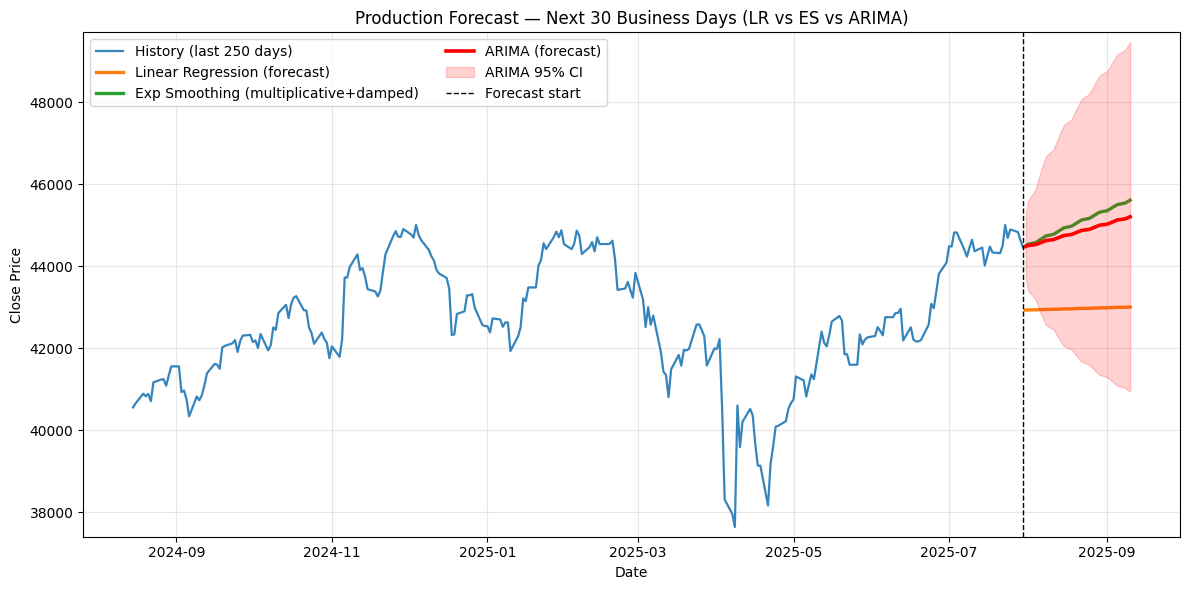

In [18]:
# === PRODUCTION FORECAST VIEW: History (tail) + future only ===
tail_n = 250
hist_tail = y_recent.tail(tail_n)  # last-year subset already; adjust if you want more/less context

plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (last 250 days)', linewidth=1.6, alpha=0.9)

# Forecast lines
plt.plot(lin_fc.index, lin_fc, label='Linear Regression (forecast)', linewidth=2.4)
plt.plot(es_fc.index, es_fc, label=f'Exp Smoothing ({es_choice})', linewidth=2.4)
plt.plot(arima_fc.index, arima_fc, label='ARIMA (forecast)', linewidth=2.6, color='red', zorder=5)

# ARIMA 95% CI
plt.fill_between(arima_fc.index, arima_lower, arima_upper, alpha=0.18, label='ARIMA 95% CI', color='red', zorder=4)

# Forecast start marker
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

# tidy y-limits
ymin = pd.concat([hist_tail, arima_lower, arima_upper, lin_fc, es_fc, arima_fc]).min()
ymax = pd.concat([hist_tail, arima_lower, arima_upper, lin_fc, es_fc, arima_fc]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('Production Forecast — Next 30 Business Days (LR vs ES vs ARIMA)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', ncol=2, frameon=True)
plt.tight_layout()
plt.show()



In [11]:
# ==========================
# GLOBAL DIAGNOSTICS ON FULL HISTORY (before any prediction)
# ==========================
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox

def _ols_fit(X, y):
    Xc = sm.add_constant(np.asarray(X), has_constant='add')
    res = sm.OLS(np.asarray(y), Xc).fit()
    return res

def build_regression_family_table_full(y_full: pd.Series) -> pd.DataFrame:
    """Like your screenshot: R²/F/df/Sig + parameter estimates, on the FULL series."""
    t = np.arange(1, len(y_full)+1, dtype=float)
    rows = []

    def add_row(name, X, y_tr, transform='identity'):
        res = _ols_fit(X, y_tr)

        params = np.asarray(res.params)  # works whether Series or ndarray
        const = float(params[0])
        betas = list(params[1:]) + [np.nan, np.nan, np.nan]
        b1, b2, b3 = betas[:3]

        rows.append({
            "Equation": name,
            "R Square": float(res.rsquared),             # in-sample on the fitting scale
            "F": float(res.fvalue) if res.fvalue is not None else np.nan,
            "df1": float(res.df_model),
            "df2": float(res.df_resid),
            "Sig.": float(res.f_pvalue) if res.f_pvalue is not None else np.nan,
            "Constant": const,
            "b1": float(b1) if b1==b1 else np.nan,
            "b2": float(b2) if b2==b2 else np.nan,
            "b3": float(b3) if b3==b3 else np.nan,
            "AIC": float(res.aic),
            "BIC": float(res.bic)
        })

    # 1) Linear: y = a + b*t
    add_row("Linear", t.reshape(-1,1), y_full.values)

    # 2) Logarithmic: y = a + b*ln(t)
    add_row("Logarithmic", np.log(t).reshape(-1,1), y_full.values)

    # 3) Inverse: y = a + b*(1/t)
    add_row("Inverse", (1.0/t).reshape(-1,1), y_full.values)

    # 4) Quadratic: y = a + b1*t + b2*t^2
    add_row("Quadratic", np.c_[t, t**2], y_full.values)

    # 5) Cubic: y = a + b1*t + b2*t^2 + b3*t^3
    add_row("Cubic", np.c_[t, t**2, t**3], y_full.values)

    # 6) Compound (Exponential growth): y = a*b^t  ↔ log(y) = A + B*t
    add_row("Compound (Exponential)", t.reshape(-1,1), np.log(y_full.values), transform='logy')

    # 7) Power: y = a*t^b  ↔ log(y) = A + B*log(t)
    add_row("Power", np.log(t).reshape(-1,1), np.log(y_full.values), transform='logy')

    df = pd.DataFrame(rows)
    df.insert(1, "Adequate (Sig<0.05)", df["Sig."] < 0.05)
    # sort by AIC (you can sort by R Square if you prefer)
    df = df.sort_values("AIC").reset_index(drop=True)
    return df

# ---- run the full-history regression table
reg_summary_full = build_regression_family_table_full(y)
print("\n=== FULL-HISTORY Model Summary and Parameter Estimates ===")
print(reg_summary_full.to_string(index=False))

# ---- Full-history Linear Regression significance (slope p-value) + R² (on log scale)
t_full = np.arange(1, len(y)+1, dtype=float).reshape(-1,1)
ols_full = _ols_fit(t_full, np.log(y.values))
lr_full_r2_log = float(ols_full.rsquared)
lr_full_p_slope = float(ols_full.pvalues[1])
print(f"\nLinear Regression (log y on time) — FULL history: R²={lr_full_r2_log:.3f}, slope p={lr_full_p_slope:.3e}")

# ---- Full-history Exponential Smoothing: in-sample R² + Ljung–Box residual p-value
es_full = ExponentialSmoothing(y, trend='add', damped_trend=True, seasonal=None).fit(optimized=True)
es_fitted = es_full.fittedvalues.reindex(y.index).dropna()
y_aligned = y.loc[es_fitted.index]
# R² (in-sample, original scale)
es_full_r2 = 1 - np.sum((y_aligned.values - es_fitted.values)**2) / np.sum((y_aligned.values - y_aligned.values.mean())**2)
# Residual white-noise check
lb = acorr_ljungbox(y_aligned - es_fitted, lags=[20], return_df=True)
es_full_ljung_p = float(lb['lb_pvalue'].iloc[0])
print(f"Exponential Smoothing (additive+damped) — FULL history: R²={es_full_r2:.3f}, Ljung–Box p={es_full_ljung_p:.3f}")



=== FULL-HISTORY Model Summary and Parameter Estimates ===
              Equation  Adequate (Sig<0.05)  R Square             F  df1    df2         Sig.      Constant            b1        b2           b3           AIC           BIC
Compound (Exponential)                 True  0.907116  85532.002590  1.0 8758.0 0.000000e+00      8.332331      0.000252       NaN          NaN  -3001.097016  -2986.941114
                 Power                 True  0.759572  27668.654504  1.0 8758.0 0.000000e+00      4.713626      0.584525       NaN          NaN   5330.314672   5344.470575
                 Cubic                 True  0.973585 107574.631376  3.0 8756.0 0.000000e+00   1732.746761      5.795826 -0.001514 1.614933e-07 154897.829828 154926.141633
             Quadratic                 True  0.933818  61779.823121  2.0 8757.0 0.000000e+00   7164.426421     -1.641859  0.000608          NaN 162941.745046 162962.978899
                Linear                 True  0.819628  39797.168033  1.0 8758.0 